In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
from itertools import product
import warnings
import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


C:\Users\chaya\AppData\Local\Temp\ipykernel_18032\527560798.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [4]:
BTC_DF = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

BTC_DF.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
BTC_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [6]:
# Converting the Timestamp column from string to datetime
BTC_DF['Timestamp'] = [datetime.fromtimestamp(x) for x in BTC_DF['Timestamp']]

In [7]:
BTC_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 296.5 MB


In [8]:
BTC_DF.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 13:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 13:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 13:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 13:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print('Dataset Shape: ',  BTC_DF.shape)

Dataset Shape:  (4857377, 8)


<Axes: title={'center': 'Bitcoin Weighted Price'}, xlabel='Timestamp'>

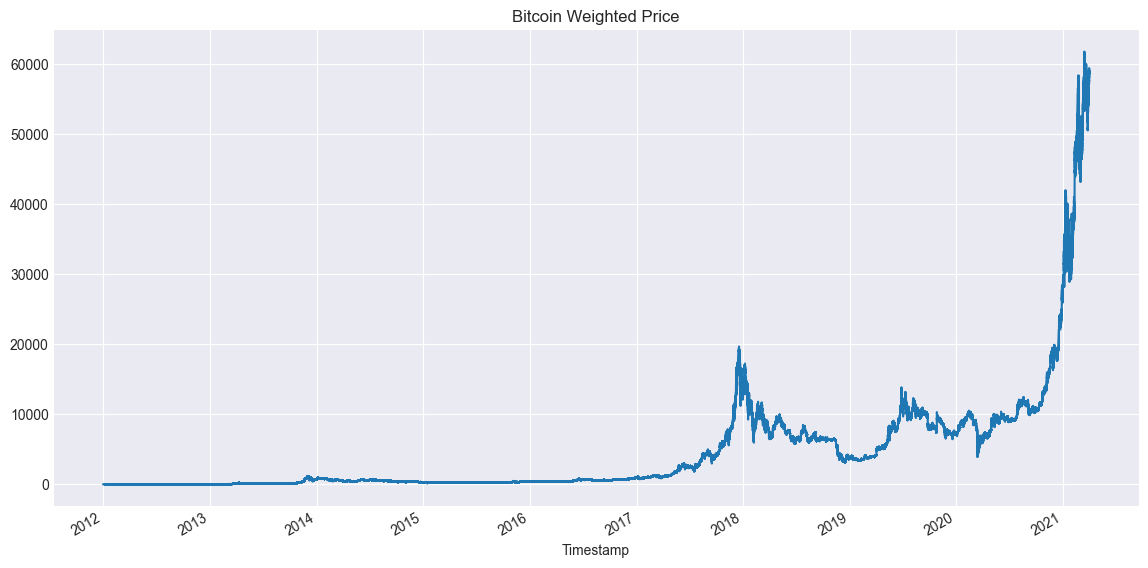

In [10]:
BTC_DF.set_index("Timestamp").Weighted_Price.plot(figsize=(14,7), title="Bitcoin Weighted Price")

In [11]:
#calculating missing values in the dataset

missing_values = BTC_DF.isnull().sum()
missing_per = (missing_values/BTC_DF.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

,Total Missing Values,Missing %
Timestamp,0,0.00000
Open,1243608,25.60246
High,1243608,25.60246
Low,1243608,25.60246
Close,1243608,25.60246
Volume_(BTC),1243608,25.60246
Volume_(Currency),1243608,25.60246
Weighted_Price,1243608,25.60246


In [12]:
def fill_missing(df):
    ### function to impute missing values using interpolation ###
    df['Open'] = df['Open'].interpolate()
    df['Close'] = df['Close'].interpolate()
    df['Weighted_Price'] = df['Weighted_Price'].interpolate()

    df['Volume_(BTC)'] = df['Volume_(BTC)'].interpolate()
    df['Volume_(Currency)'] = df['Volume_(Currency)'].interpolate()
    df['High'] = df['High'].interpolate()
    df['Low'] = df['Low'].interpolate()

    print(df.head())
    print(df.isnull().sum())

In [13]:
fill_missing(BTC_DF)

            Timestamp  Open  High   Low  Close  Volume_(BTC)  \
0 2011-12-31 13:22:00  4.39  4.39  4.39   4.39      0.455581   
1 2011-12-31 13:23:00  4.39  4.39  4.39   4.39      0.555046   
2 2011-12-31 13:24:00  4.39  4.39  4.39   4.39      0.654511   
3 2011-12-31 13:25:00  4.39  4.39  4.39   4.39      0.753977   
4 2011-12-31 13:26:00  4.39  4.39  4.39   4.39      0.853442   

   Volume_(Currency)  Weighted_Price  
0           2.000000            4.39  
1           2.436653            4.39  
2           2.873305            4.39  
3           3.309958            4.39  
4           3.746611            4.39  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [14]:
#created a copy 
bitstamp_non_indexed = BTC_DF.copy()

In [15]:
BTC_DF = BTC_DF.set_index('Timestamp')
BTC_DF.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 13:23:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 13:24:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 13:25:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 13:26:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


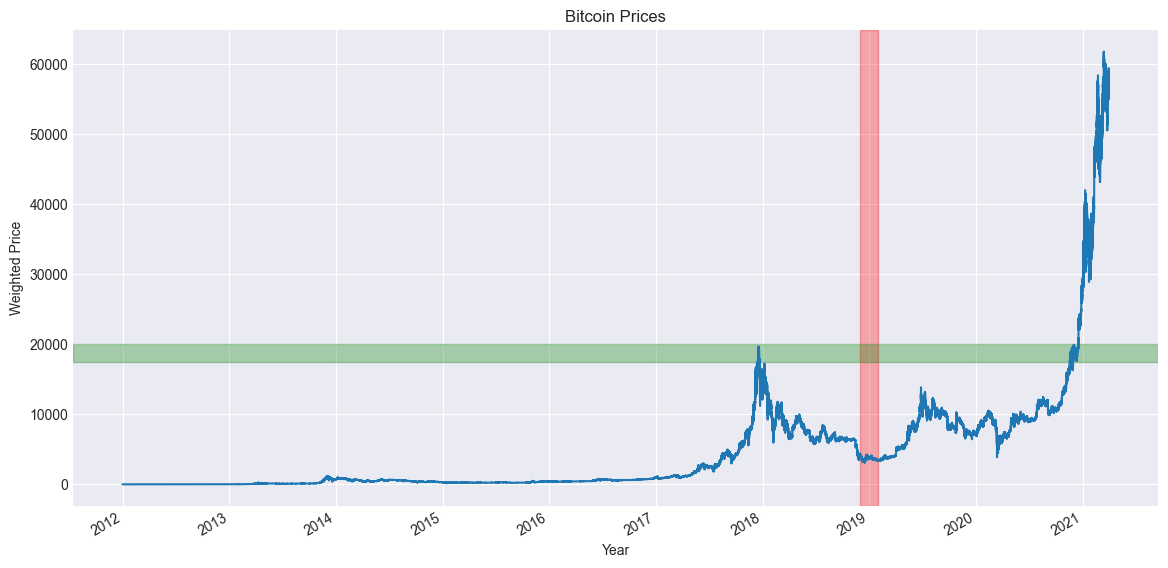

In [16]:
ax = BTC_DF['Weighted_Price'].plot(title='Bitcoin Prices', grid=True, figsize=(14,7))
ax.set_xlabel('Year')
ax.set_ylabel('Weighted Price')

ax.axvspan('2018-12-01','2019-01-31',color='red', alpha=0.3)
ax.axhspan(17500,20000, color='green',alpha=0.3)

Text(0, 0.5, 'Weighted_Price')

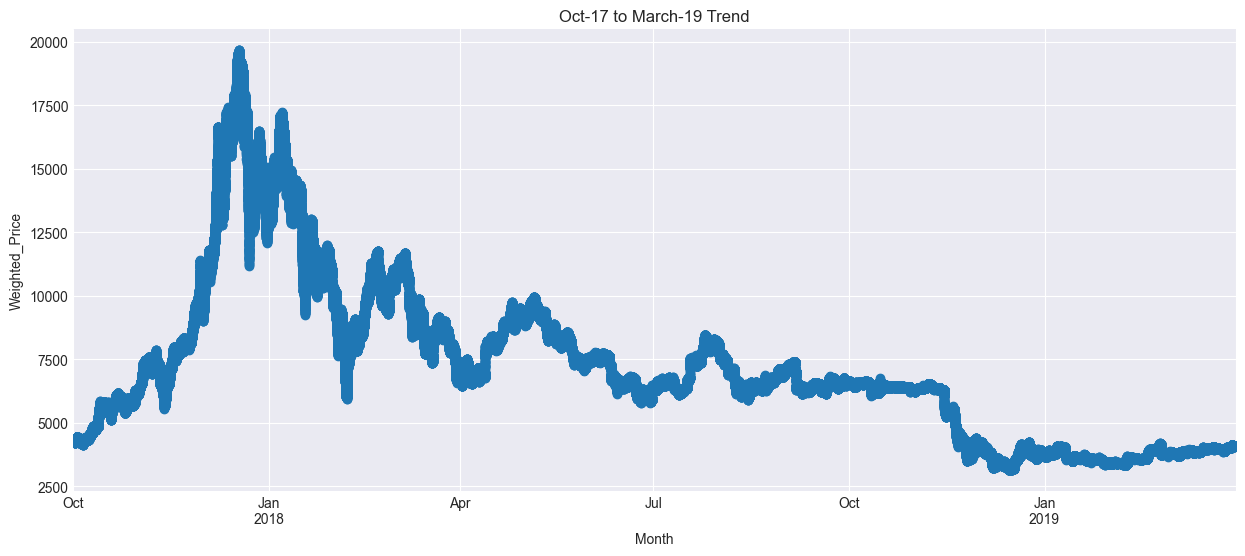

In [17]:
#Zooming in

ax = BTC_DF.loc['2017-10':'2019-03','Weighted_Price'].plot(marker='o', linestyle='-',figsize=(15,6), title="Oct-17 to March-19 Trend", grid=True)
ax.set_xlabel('Month')
ax.set_ylabel('Weighted_Price')

C:\Users\chaya\AppData\Local\Temp\ipykernel_18032\1539549472.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(BTC_DF['Weighted_Price'], shade=True)


<Axes: xlabel='Weighted_Price', ylabel='Density'>

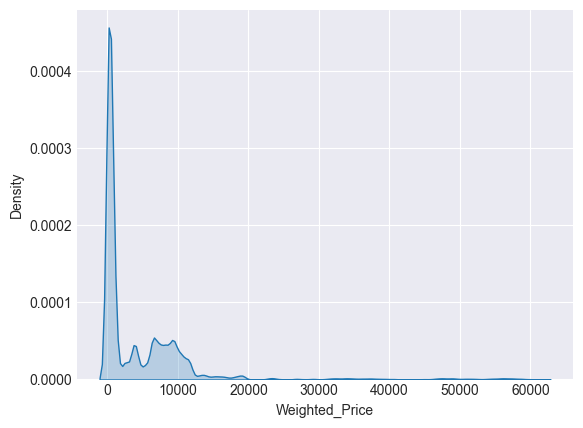

In [18]:
sns.kdeplot(BTC_DF['Weighted_Price'], shade=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


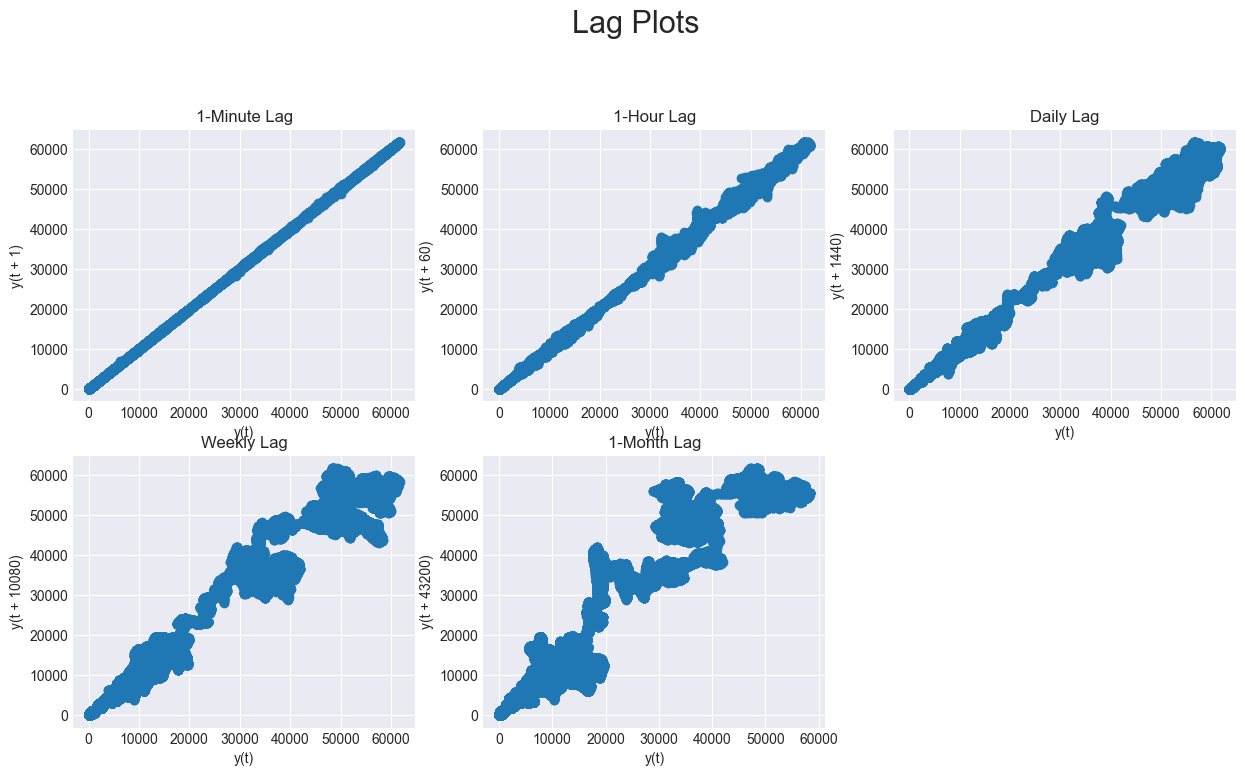

In [19]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(BTC_DF['Weighted_Price'], lag=1) #minute lag
plt.title('1-Minute Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(BTC_DF['Weighted_Price'], lag=60) #hourley lag
plt.title('1-Hour Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(BTC_DF['Weighted_Price'], lag=1440) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(BTC_DF['Weighted_Price'], lag=10080) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(BTC_DF['Weighted_Price'], lag=43200) #month lag
plt.title('1-Month Lag')

plt.legend()
plt.show()

In [20]:
hourly_data = BTC_DF.resample('1H').mean()
hourly_data = hourly_data.reset_index()

hourly_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 13:00:00,4.39,4.39,4.39,4.39,2.295689,10.078075,4.39
1,2011-12-31 14:00:00,4.39,4.39,4.39,4.39,7.169489,31.474059,4.39
2,2011-12-31 15:00:00,4.39,4.39,4.39,4.39,13.137408,57.673222,4.39
3,2011-12-31 16:00:00,4.39,4.39,4.39,4.39,19.105327,83.872385,4.39
4,2011-12-31 17:00:00,4.39,4.39,4.39,4.39,25.073246,110.071548,4.39


In [21]:

BTC_Price_daily = BTC_DF.resample("24H").mean() #daily resampling

In [22]:
import plotly.express as px

BTC_Price_daily.reset_index(inplace=True)
fig = px.line(BTC_Price_daily, x='Timestamp', y='Weighted_Price', title='Weighted Price with Range Slider and Selectors')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

In [23]:
plot_ = BTC_Price_daily.set_index("Timestamp")["2017-12"]

C:\Users\chaya\AppData\Local\Temp\ipykernel_18032\1796570089.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Candlestick(x= plot_.index,
                    open=plot_['Open'],
                    high=plot_['High'],
                    low=plot_['Low'],
                    close=plot_['Close']))
fig.show()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [26]:
fill_missing(BTC_Price_daily)

   Timestamp      Open      High       Low     Close  Volume_(BTC)  \
0 2011-12-31  4.422837  4.426677  4.422837  4.426677     24.024874   
1 2012-01-01  4.677625  4.677625  4.677625  4.677625      5.883361   
2 2012-01-02  4.991701  4.991701  4.991701  4.991701     13.503075   
3 2012-01-03  5.175495  5.175495  5.175495  5.175495     11.136690   
4 2012-01-04  5.120500  5.133742  5.120500  5.133742      8.327158   

   Volume_(Currency)  Weighted_Price  
0         105.980529        4.424286  
1          27.923145        4.677625  
2          67.432386        4.991701  
3          56.749845        5.175495  
4          43.510443        5.125202  
Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64


In [27]:
BTC_Price_daily.Weighted_Price

0           4.424286
1           4.677625
2           4.991701
3           5.175495
4           5.125202
            ...     
3374    54788.954020
3375    56002.734323
3376    56376.937694
3377    58075.416823
3378    58758.891360
Name: Weighted_Price, Length: 3379, dtype: float64

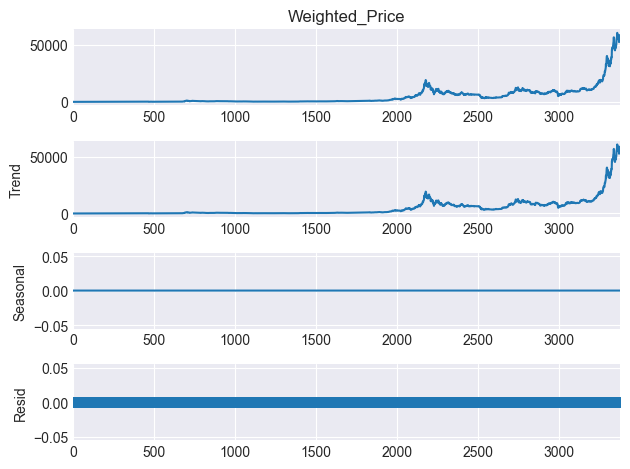

<Figure size 1500x1200 with 0 Axes>

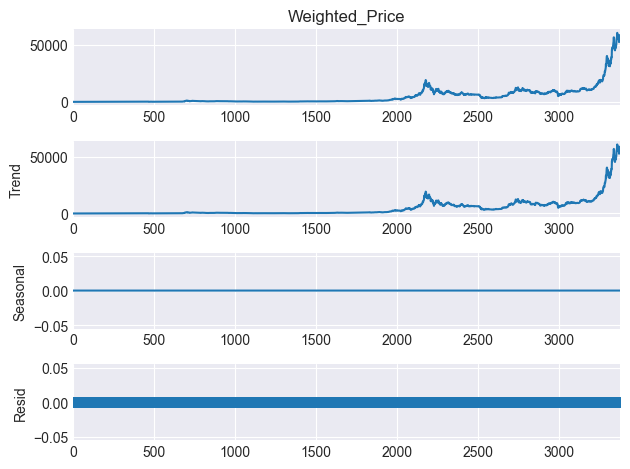

In [28]:
plt.figure(figsize=(15,12))
series = BTC_Price_daily.Weighted_Price
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

In [29]:
stats, p, lags, critical_values = kpss(series, 'ct')

c:\Users\chaya\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




In [30]:
print(f'Test Statistics : {stats}')
print(f'p-value : {p}')
print(f'Critical Values : {critical_values}')

if p < 0.05:
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics : 0.6463274702949123
p-value : 0.01
Critical Values : {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not Stationary


In [31]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print("dftest: ", dftest)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)
    
    if p > 0.05:
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

In [32]:
adf_test(series)

Results of Dickey-Fuller Test:
dftest:  (6.302120534312766, 1.0, 29, 3349, {'1%': -3.432304111473485, '5%': -2.862403412310526, '10%': -2.56722961145352}, 48472.31981125205)
Test Statistic                    6.302121
p-value                           1.000000
#Lags Used                       29.000000
Number of Observations Used    3349.000000
Critical Value (1%)              -3.432304
Critical Value (5%)              -2.862403
Critical Value (10%)             -2.567230
dtype: float64
Series is Stationary


In [33]:
BTC_DF.reset_index(drop=False, inplace=True)

rolling_features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
window1 = 3
window2 = 7
window3 = 30


df_rolled_3d = BTC_DF[rolling_features].rolling(window=window1, min_periods=0)
df_rolled_7d = BTC_DF[rolling_features].rolling(window=window2, min_periods=0)
df_rolled_30d = BTC_DF[rolling_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

In [34]:
df_mean_30d

,index,Open,High,Low,Close,Volume_(BTC)
0,0,NaN,NaN,NaN,NaN,NaN
1,1,4.390000,4.390000,4.390000,4.390000,0.455581
2,2,4.390000,4.390000,4.390000,4.390000,0.505314
3,3,4.390000,4.390000,4.390000,4.390000,0.555046
4,4,4.390000,4.390000,4.390000,4.390000,0.604779
...,...,...,...,...,...,...
4857372,4857372,58676.079167,58687.680500,58668.090667,58677.166333,1.886850
4857373,4857373,58677.095833,58688.109833,58668.163667,58676.951000,1.928371
4857374,4857374,58676.777167,58686.858833,58667.845000,58675.446000,2.152934
4857375,4857375,58675.239167,58686.334500,58666.904333,58675.519000,2.206887


In [35]:
df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

# Just print to see the structure of one of them
df_std_30d

,index,Open,High,Low,Close,Volume_(BTC)
0,0,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN
2,2,0.000000,0.000000,0.000000,0.000000,0.070333
3,3,0.000000,0.000000,0.000000,0.000000,0.099465
4,4,0.000000,0.000000,0.000000,0.000000,0.128409
...,...,...,...,...,...,...
4857372,4857372,53.296466,54.527288,49.109527,51.581026,3.937292
4857373,4857373,53.738097,54.689746,49.135320,51.528436,3.924771
4857374,4857374,53.665578,54.101851,48.995937,50.546588,4.034845
4857375,4857375,52.451372,53.647698,48.191616,50.617150,4.017050


In [36]:
for feature in rolling_features:
    BTC_DF[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    BTC_DF[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    BTC_DF[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    BTC_DF[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    BTC_DF[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    BTC_DF[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

BTC_DF.fillna(BTC_DF.mean(), inplace=True)

BTC_DF.set_index("Timestamp", drop=False, inplace=True)
BTC_DF.head()

C:\Users\chaya\AppData\Local\Temp\ipykernel_18032\4126304062.py:10: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31 13:22:00,2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39,4591.937051,4591.91288,...,4591.766472,3.592157,5.208492,9.921556,9.535769,9.535768,9.535764,6.577566,8.694226,12.540007
2011-12-31 13:23:00,2011-12-31 13:23:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39,4.390000,4.39000,...,4.390000,3.592157,5.208492,9.921556,0.455581,0.455581,0.455581,6.577566,8.694226,12.540007
2011-12-31 13:24:00,2011-12-31 13:24:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39,4.390000,4.39000,...,4.390000,0.000000,0.000000,0.000000,0.505314,0.505314,0.505314,0.070333,0.070333,0.070333
2011-12-31 13:25:00,2011-12-31 13:25:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39,4.390000,4.39000,...,4.390000,0.000000,0.000000,0.000000,0.555046,0.555046,0.555046,0.099465,0.099465,0.099465
2011-12-31 13:26:00,2011-12-31 13:26:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39,4.390000,4.39000,...,4.390000,0.000000,0.000000,0.000000,0.654511,0.604779,0.604779,0.099465,0.128409,0.128409


In [37]:
BTC_DF["month"] = BTC_DF.Timestamp.dt.month
BTC_DF["week"] = BTC_DF.Timestamp.dt.week
BTC_DF["day"] = BTC_DF.Timestamp.dt.day
BTC_DF["day_of_week"] = BTC_DF.Timestamp.dt.dayofweek
BTC_DF.head()

C:\Users\chaya\AppData\Local\Temp\ipykernel_18032\692927444.py:2: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Open_mean_lag3,Open_mean_lag7,...,Volume_(BTC)_mean_lag3,Volume_(BTC)_mean_lag7,Volume_(BTC)_mean_lag30,Volume_(BTC)_std_lag3,Volume_(BTC)_std_lag7,Volume_(BTC)_std_lag30,month,week,day,day_of_week
Timestamp,,,,,,,,,,,,,,,,,,,,,
2011-12-31 13:22:00,2011-12-31 13:22:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39,4591.937051,4591.91288,...,9.535769,9.535768,9.535764,6.577566,8.694226,12.540007,12,52,31,5
2011-12-31 13:23:00,2011-12-31 13:23:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39,4.390000,4.39000,...,0.455581,0.455581,0.455581,6.577566,8.694226,12.540007,12,52,31,5
2011-12-31 13:24:00,2011-12-31 13:24:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39,4.390000,4.39000,...,0.505314,0.505314,0.505314,0.070333,0.070333,0.070333,12,52,31,5
2011-12-31 13:25:00,2011-12-31 13:25:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39,4.390000,4.39000,...,0.555046,0.555046,0.555046,0.099465,0.099465,0.099465,12,52,31,5
2011-12-31 13:26:00,2011-12-31 13:26:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39,4.390000,4.39000,...,0.654511,0.604779,0.604779,0.099465,0.128409,0.128409,12,52,31,5


In [38]:
df_train = BTC_DF[BTC_DF.Timestamp < "2020"]
df_valid = BTC_DF[BTC_DF.Timestamp >= "2020"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (4201846, 42)
validation shape : (655531, 42)


In [39]:
import pmdarima as pm

In [40]:
exogenous_features = ['Open_mean_lag3',
       'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7',
       'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
       'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3',
       'Low_mean_lag7', 'Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7',
       'Low_std_lag30', 'Close_mean_lag3', 'Close_mean_lag7',
       'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7',
       'Close_std_lag30', 'Volume_(BTC)_mean_lag3', 'Volume_(BTC)_mean_lag7',
       'Volume_(BTC)_mean_lag30', 'Volume_(BTC)_std_lag3',
       'Volume_(BTC)_std_lag7', 'Volume_(BTC)_std_lag30', 'month', 'week',
       'day', 'day_of_week']

In [41]:
# providing input and output data
# import numPy Library
# the input data (x, regressor)
x =np.array(BTC_DF["Volume_(Currency)"]).reshape(-1,1)

In [42]:
x.shape

(4857377, 1)

In [43]:
print(x)

[[2.00000002e+00]
 [2.43665274e+00]
 [2.87330546e+00]
 ...
 [1.00117070e+05]
 [4.23329586e+04]
 [1.59417751e+05]]


In [44]:
print(type(x))

<class 'numpy.ndarray'>


In [45]:
# The output data (y, predictor)
y=np.array(BTC_DF["Weighted_Price"])
y.shape

(4857377,)

In [46]:
print(y)

[4.39000000e+00 4.39000000e+00 4.39000000e+00 ... 5.86961985e+04
 5.87618662e+04 5.87643494e+04]


In [47]:
print(type(y))


<class 'numpy.ndarray'>


In [48]:
# splitting the dataset
# import train_test_split
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)
# Exploring the train and test dataset
x_train.shape

(3400163, 1)

In [49]:
x_test.shape

(1457214, 1)

In [50]:
print(y_train.shape)

(3400163,)


In [51]:
print(y_test.shape)

(1457214,)


In [52]:
knn_model = KNeighborsRegressor(n_neighbors=5).fit(x_train, y_train)

# Score
score_knn = knn_model.score(x_test, y_test)
score_knn

0.2014921265710422

In [53]:
#Predictions
preds = knn_model.predict(x_test)

# Performance
performance = pd.DataFrame({ 'True Value': y_test,
                         'Prediction': preds,
                           'Error': y_test - preds})
 #View
#performance

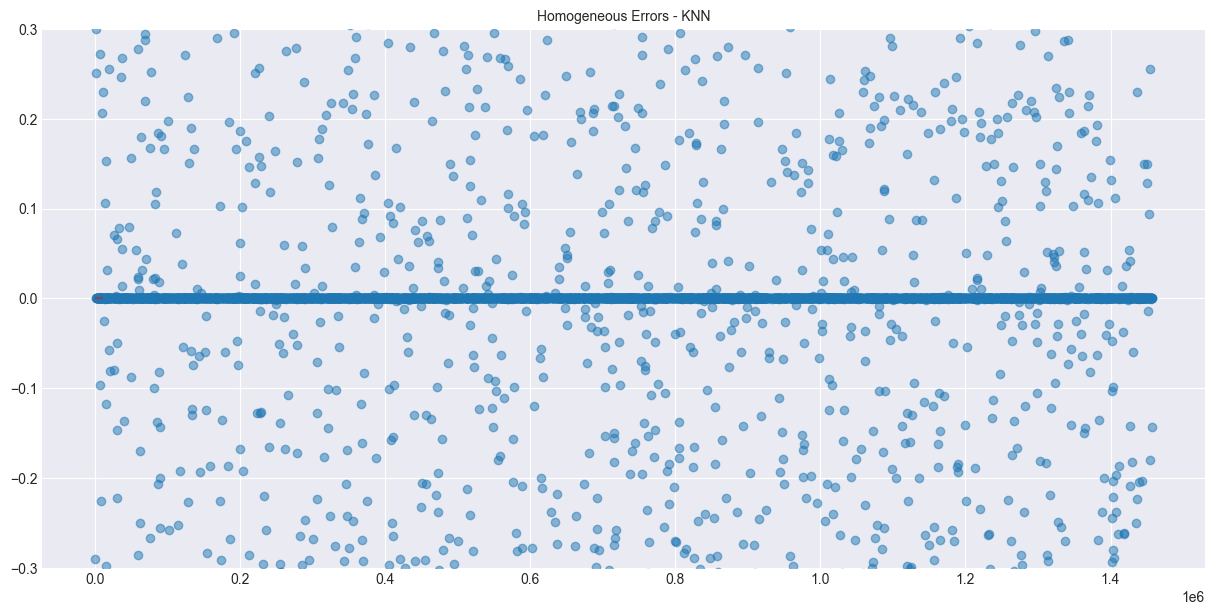

In [54]:
plt.figure(figsize=(15,7))
# Errors
ax_x= performance['True Value']
ax_y= performance['Prediction']
yerr= performance['Error']
plt.scatter(range(len(yerr)), yerr, alpha=.5)
plt.title('Homogeneous Errors - KNN', size=10);
plt.hlines(y=0, xmin=0, xmax=11000, linestyle='--', color='red', alpha=.5);
plt.ylim(-.3, .3);

In [55]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score

Text(0, 0.5, 'Error')

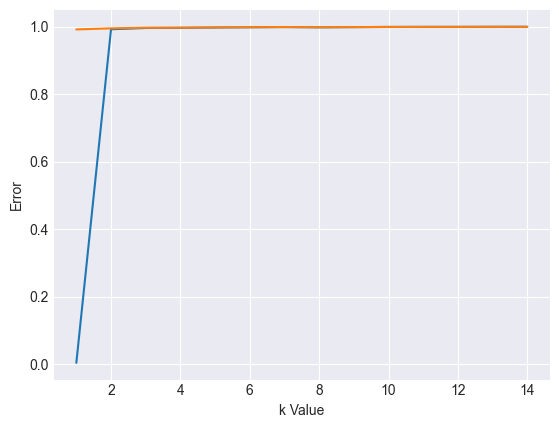

In [56]:
error1= []
error2= []
for k in range(1,15):
    knn= KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    error2.append(np.mean(y_test!= y_pred2))
# plt.figure(figsize(10,5))
plt.plot(range(1,15),error1, label="train")
plt.plot(range(1,15),error2, label="test")
plt.xlabel('k Value')
plt.ylabel('Error')

In [57]:
X = BTC_DF.iloc[:,2].values.astype(float)
y = BTC_DF.iloc[:,2:3].values.astype(float)

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [59]:
from sklearn.utils.validation import check_array
import numpy as np
x = np.array([2,4])
check_array(x, ensure_2d=False)
print(x)

[2 4]


In [60]:
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [62]:
from sklearn.svm import SVR
classifier = SVR(kernel = 'linear')
classifier.fit=(X_train, y_train)

In [63]:
classifier = SVR(kernel='rbf')
X=X.reshape(-1,1)
classifier.fit(X,y.values.ravel())

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [64]:
print("Scaled X_train:")
print(X_train)
print("Scaled X_test:")
print(X_test)

Scaled X_train:
[[ 0.51628424]
 [ 0.24711491]
 [-0.44653545]
 ...
 [-0.51257171]
 [-0.51955792]
 [ 0.62380027]]
Scaled X_test:
[[-0.46748304]
 [ 6.60178293]
 [-0.51891946]
 ...
 [ 0.85558892]
 [-0.43494895]
 [-0.55151972]]


NotFittedError: This SVR instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

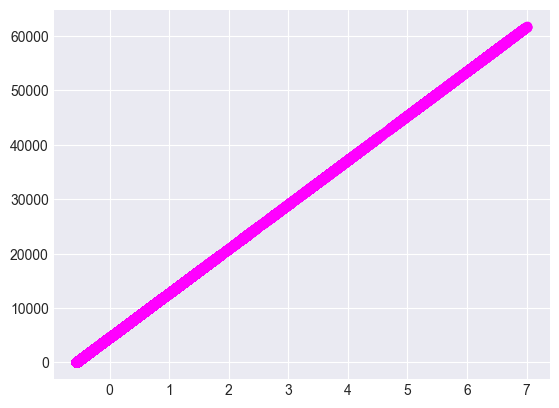

In [65]:
plt.scatter(X_train, y_train, color = 'magenta')
plt.plot(X, classifier.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('BTC_Price')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

# generate synthetic data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# add some noise to the data
y[::5] += 3 * (0.5 - np.random.rand(8))

# create an SVR model with a linear kernel
svr = SVR(kernel='poly')

# train the model on the data
svr.fit(X, y)

# make predictions on the data
y_pred = svr.predict(X)

# plot the predicted values against the true values
plt.scatter(X, y, color='darkorange',
			label='data')
plt.plot(X, y_pred, color='cornflowerblue',
		label='prediction')
plt.legend()
plt.show()


In [ ]:
features = ["Open", "High", "Low", "Close","Volume_(BTC)"]
X = BTC_DF[features]
y = BTC_DF['Weighted_Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)

In [ ]:
# Fit Model
rf_model.fit(X_train,y_train)

In [ ]:
f_pred = rf_model.predict(X_test)

In [ ]:
print(rf_model.predict(X.tail()))
BTC_DF['Weighted_Price'].tail()

In [ ]:
#Calculate mean absolute error
from sklearn.metrics import mean_absolute_error
rf_val_mae = mean_absolute_error(y_test,rf_pred)
rf_val_mae